<a href="https://colab.research.google.com/github/varunk04/ImageClassification_using_ResNet50/blob/main/Object_detection_Using_RESNET50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dwonloading data from kaggle:

The data is the CIFAR-10 which is having 60000 images of 10 classes, ecah of size 32 * 32.

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuarting the path of the kaggle.json file:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# dataset API:
!kaggle competitions download -c cifar-10


 97% 695M/715M [00:03<00:00, 296MB/s]
100% 715M/715M [00:03<00:00, 216MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
# Extracting the Zip file:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('dataset sucessfully extracted:') 

dataset sucessfully extracted:


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [ ]:
# We are only intrested in train dataset, which is of 7z type so we have to extract thi sfile:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.4/390.4 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.7 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode = 'r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the dependencies:

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
len(filenames)

50000

So my training data contains 50k images. 

In [ ]:
print(filenames[:5])

['21184.png', '12693.png', '7312.png', '26553.png', '10231.png']


Now lets Process the labels of the images:

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


**id** column in Dataframe is the image name and **label** column is the label for that image:

In [ ]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

There are 10 classes each of 5000 images.

In [ ]:
labels_dict = {'airplane':0,
               'automobile':1,
               'bird':2,
               'cat':3,
               'deer':4,
               'dog':5,
               'frog':6,
               'horse':7,
               'ship':8,
               'truck':9}

labels = [labels_dict[i] for i in labels_df['label']]

In [ ]:
labels[0:5]

[6, 9, 9, 4, 1]

In [ ]:
len(labels)

50000

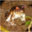

(None, (32, 32, 3))

In [ ]:
# displaying the sample images:

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/1.png')
cv2_imshow(img), img.shape

Training image is very small, we can see that its a 32 * 32 color image.

In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[:5])

[1, 2, 3, 4, 5]


### IMAGE PROCESING:

In [ ]:
# Convert the images to numpy array:

train_data_folder = '/content/train/'

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data), len(data)

(list, 50000)

In [ ]:
type(data[0]), data[0].shape

(numpy.ndarray, (32, 32, 3))

### Preparing features and label data:

In [ ]:
# Convert images list and labels list to numpy array:

X = np.array(data)
y = np.array(labels)

In [ ]:
type(X), X.shape , y.shape

(numpy.ndarray, (50000, 32, 32, 3), (50000,))

In [ ]:
# Lets spilt the data for training and testing:

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape,X_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
# Scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.13333333, 0.14117647, 0.16862745],
        [0.14509804, 0.14509804, 0.2       ],
        [0.17254902, 0.17254902, 0.25098039],
        ...,
        [0.24313725, 0.28627451, 0.36470588],
        [0.20392157, 0.24705882, 0.3254902 ],
        [0.17647059, 0.22352941, 0.30196078]],

       [[0.1372549 , 0.1372549 , 0.14509804],
        [0.13333333, 0.13333333, 0.15686275],
        [0.13333333, 0.12941176, 0.16862745],
        ...,
        [0.22745098, 0.27058824, 0.34901961],
        [0.19607843, 0.23529412, 0.31372549],
        [0.18431373, 0.22745098, 0.30588235]],

       [[0.13333333, 0.12941176, 0.1372549 ],
        [0.12941176, 0.1254902 , 0.14117647],
        [0.12941176, 0.1254902 , 0.14901961],
        ...,
        [0.25882353, 0.30196078, 0.38039216],
        [0.2       , 0.24313725, 0.32156863],
        [0.20784314, 0.25098039, 0.32941176]],

       ...,

       [[0.1254902 , 0.1254902 , 0.14901961],
        [0.1254902 , 0.12156863, 0.14509804],
        [0.12941176, 0

### Building the Neural Network:

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10

Bilding a simple Neural Network:

In [ ]:
# 1. Building the model:

model = keras.Sequential([
    
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(64,activation ='relu'),
    keras.layers.Dense(num_of_classes, activation = 'softmax')
])

# 2. compiling the model:

model.compile(
    loss ='sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['acc']
)

In [ ]:
# 3. Fitting the model:
model.fit(X_train_scaled, y_train,validation_split = 0.1, epochs = 10 )

Epoch 1/10
1125/1125 [==============================] - 10s 4ms/step - loss: 2.0308 - acc: 0.2376 - val_loss: 1.9375 - val_acc: 0.2752
Epoch 2/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.9050 - acc: 0.2986 - val_loss: 1.8734 - val_acc: 0.3045
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8759 - acc: 0.3148 - val_loss: 1.8783 - val_acc: 0.3010
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8576 - acc: 0.3225 - val_loss: 1.8792 - val_acc: 0.3020
Epoch 5/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.8427 - acc: 0.3279 - val_loss: 1.8422 - val_acc: 0.3310
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8318 - acc: 0.3344 - val_loss: 1.8284 - val_acc: 0.3377
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8287 - acc: 0.3335 - val_loss: 1.8600 - val_acc: 0.3195
Epoch 8/10
1125/1125 [==============================] - 3s 3m

* A very simple NN gave accuracy about   34% which is as good as random guess.
* Usually convolution layers of CNN models perform better on the image data.
* there are whole lot of pre- built model which we can use.
for ex: ResNet, LeNet, MobileNet, etc.

### Using ResNet50:

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense,Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
conv_base = ResNet50(weights = 'imagenet', include_top=False, input_shape = (256, 256, 3))
conv_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
model = models.Sequential()

#Upscaling 32 * 32 size image to 256 * 256 size, since ResNet only takes 256*256 size image
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))

#Adding the ResNet Architecture 
model.add(conv_base)

#Adding our custom layers for our Data
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_of_classes, activation = 'softmax'))

In [ ]:
model.compile(optimizer = optimizers.RMSprop(learning_rate = 2e-5),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
# Fitting the model:

history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs = 10)

Epoch 1/10
1125/1125 [==============================] - 471s 383ms/step - loss: 1.6805 - acc: 0.4431 - val_loss: 0.8839 - val_acc: 0.7638
Epoch 2/10
1125/1125 [==============================] - 443s 393ms/step - loss: 1.0123 - acc: 0.7019 - val_loss: 0.4908 - val_acc: 0.8913
Epoch 3/10
1125/1125 [==============================] - 435s 387ms/step - loss: 0.7521 - acc: 0.8053 - val_loss: 0.3860 - val_acc: 0.9055
Epoch 4/10
1125/1125 [==============================] - 442s 393ms/step - loss: 0.5804 - acc: 0.8664 - val_loss: 0.3182 - val_acc: 0.9212
Epoch 5/10
1125/1125 [==============================] - 435s 387ms/step - loss: 0.4568 - acc: 0.9047 - val_loss: 0.2785 - val_acc: 0.9268
Epoch 6/10
1125/1125 [==============================] - 435s 387ms/step - loss: 0.3546 - acc: 0.9349 - val_loss: 0.2555 - val_acc: 0.9352
Epoch 7/10
1125/1125 [==============================] - 435s 387ms/step - loss: 0.2856 - acc: 0.9514 - val_loss: 0.2315 - val_acc: 0.9420
Epoch 8/10
1125/1125 [============

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 40s 117ms/step - loss: 0.2219 - acc: 0.9403


[0.22187592089176178, 0.9402999877929688]

* Training accracy is about 97%
* Testing Accuracy is about 94%
So model is not overfitting as such

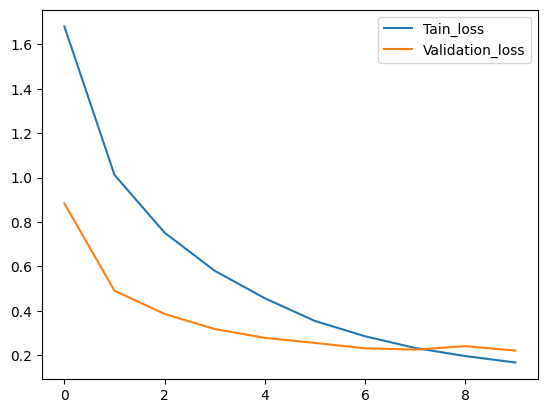

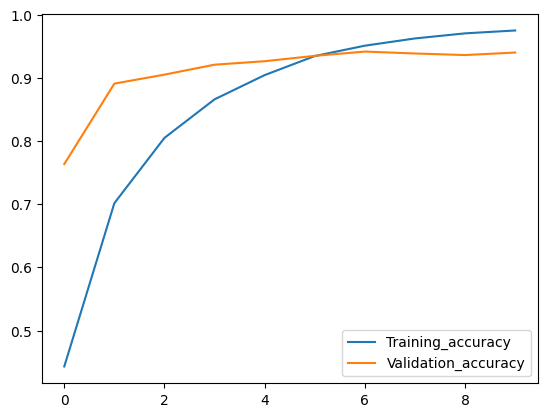

In [ ]:
# Lets plot the history:

h = history

# plotting the loss value:
plt.plot(h.history['loss'], label = 'Tain_loss')
plt.plot(h.history['val_loss'], label = 'Validation_loss')
plt.legend()
plt.show()

# Plotting the accuracy value:
plt.plot(h.history['acc'], label = 'Training_accuracy')
plt.plot(h.history['val_acc'], label = 'Validation_accuracy')
plt.legend()
plt.show()